In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# import metrics MRL
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

In [66]:
#CARGA DEL DATASET EN UN DATAFRAME DE PANDAS
data = pd.read_excel("Tabla_GDP_1parcial.xlsx")
df = pd.DataFrame(data)
df

,province,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap
0,Buenos Aires,2.926899e+08,1.383240,8.167798,5.511856,0.766168,48.7947,4.4,15625084,0.000006,0.004836
1,Catamarca,6.150949e+06,2.344140,9.234095,10.464484,0.951963,45.0456,1.5,367828,0.000005,0.004502
2,Córdoba,6.936374e+07,2.714140,5.382380,10.436086,1.035056,45.7640,4.8,3308876,0.000011,0.010175
3,Corrientes,7.968013e+06,NaN,12.747191,17.438858,3.864265,62.1103,5.9,992595,0.000004,0.004495
4,Chaco,9.832643e+06,7.517580,15.862619,31.479527,2.577462,65.5104,7.5,1055259,0.000003,0.003605
5,Chubut,1.774785e+07,1.548060,8.051752,8.044618,0.586309,39.5473,3.0,509108,0.000016,0.004498
6,Entre Ríos,2.074341e+07,3.185580,7.288751,18.794568,NaN,NaN,3.1,1235994,0.000006,0.004679
7,Formosa,3.807057e+06,4.610640,17.035583,28.004985,2.268974,65.8126,16.2,530162,0.000004,0.003440
8,Jujuy,NaN,2.151390,13.367965,12.483179,0.721295,54.1615,3.7,673307,0.000003,0.003958
9,La Pampa,6.990262e+06,1.539300,3.398774,16.505714,0.204093,45.4764,7.2,318951,0.000019,0.005415


In [67]:
df.describe()

,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap
count,2.000000e+01,20.000000,22.000000,22.000000,20.000000,20.000000,22.000000,2.200000e+01,22.000000,22.000000
mean,3.277525e+07,3.166403,9.925625,12.677304,1.749807,50.391715,4.986364,1.686352e+06,0.000007,0.004894
std,6.456121e+07,1.847379,3.779530,7.216860,1.201194,9.374135,3.498339,3.219828e+06,0.000004,0.001522
min,3.807057e+06,0.791485,3.398774,3.839852,0.204093,29.232100,0.800000,2.739640e+05,0.000002,0.002821
25%,8.188735e+06,1.967893,7.472754,7.569677,0.754950,45.368700,3.025000,5.143715e+05,0.000004,0.004061
50%,1.172229e+07,2.743675,9.142440,10.865881,1.437767,49.370500,4.000000,7.775305e+05,0.000006,0.004757
75%,2.119858e+07,3.517830,12.500143,16.100647,2.651142,55.079600,5.875000,1.230606e+06,0.000009,0.005334
max,2.926899e+08,7.517580,17.035583,31.479527,3.864265,65.812600,16.200000,1.562508e+07,0.000019,0.010175


In [68]:
#ANALIZAMOS VALORES NULOS
df.isnull().sum()

province                  0
gdp                       2
illiteracy                2
poverty                   0
deficient_infra           0
school_dropout            2
no_healthcare             2
birth_mortal              0
pop                       0
movie_theatres_per_cap    0
doctors_per_cap           0
dtype: int64

VAMOS A ANALIZAR LAS COLUMNAS CON DATOS NULOS QUE SON IMPORTANTES PARA NUESTRA REGRESIÓN
ANALIZAMOS QUE TANTA DIFERENCIA HAY ENTRE LA MEDIA Y LA MEDIANA, PARA ELEGIR NUESTRA
MEDIDA DE TENDENCIA CENTRAL A UTILIZAR PARA IMPUTAR LOS VALORES NULOS

In [69]:
school_media = df["school_dropout"].mean()
school_mediana = df["school_dropout"].median()
print(f"La media es: {round(school_media, 2)} y la mediana: {round(school_mediana, 2)}")

La media es: 1.75 y la mediana: 1.44


In [70]:
illiteracy_media = df["illiteracy"].mean()
illiteracy_mediana = df["illiteracy"].median()
print(f"La media es: {round(illiteracy_media, 2)} y la mediana: {round(illiteracy_mediana, 2)}")

La media es: 3.17 y la mediana: 2.74


In [71]:
#COMO PARTE DEL PREPROCESAMIENTO DE DATOS, IMPUTAMOS LOS VALORES NULOS POR LA MEDIANA QUE ES EL VALOR O MEDIDA DE 
#TENDENCIA CENTRAL QUE ERA MÁS ACORDE EN NUESTRO CONJUNTO DE DATOS
school_mediana = df["school_dropout"].median()
illiteracy_mediana = df["illiteracy"].median()

df["school_dropout"].fillna(school_mediana, inplace= True)
df["illiteracy"].fillna(illiteracy_mediana, inplace= True)

C:\Users\kemer\AppData\Local\Temp\ipykernel_20700\3369324567.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["school_dropout"].fillna(school_mediana, inplace= True)
C:\Users\kemer\AppData\Local\Temp\ipykernel_20700\3369324567.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [72]:
#NUESTRO DF, EN LAS COLUMNAS DE USO PARA NUESTRA REGRESIÓN, QUEDA CON VALORES NULOS YA IMPUTADOS
# school_dropout, illiteracy y doctors_per_cap
df.isnull().sum()

province                  0
gdp                       2
illiteracy                0
poverty                   0
deficient_infra           0
school_dropout            0
no_healthcare             2
birth_mortal              0
pop                       0
movie_theatres_per_cap    0
doctors_per_cap           0
dtype: int64

In [73]:
#SELECCIÓN DE NUESTRAS VARIABLES INDEPENDIENTES Y DEPENDIENTES O VARIABLE OBJETIVO
x = pd.DataFrame(df, columns=["illiteracy","doctors_per_cap"])
y = pd.DataFrame(df, columns=["school_dropout"])

#Particion del dataset con 20% datos para el conjunto de testing, 80% entrenamiento
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=1)

x_test.head(5)

,illiteracy,doctors_per_cap
19,1.975940,0.006672
16,2.963260,0.005044
3,2.743675,0.004495
13,1.943750,0.005067
18,0.791485,0.004271


In [74]:
#GENERAMOS EL MODELO DE REGRESION LINEAL
model = LinearRegression() 

#ENTRENAMOS EL MODELO, LO "FITEAMOS"
model = model.fit(x_train,y_train)

#GENERAMOS LA PREDICCIÓN DEL MODELO
pred = model.predict(x_test) 

#GENERAMOS UN ARRAY DE NUMPY CON LAS PREDICCIONES
pred = np.array(pred,dtype=float)
pred

array([[1.00224606],
       [1.36763307],
       [1.29248086],
       [1.00146493],
       [0.59313262]])

In [75]:
#OBTENEMOS LOS COEFICIENTES DEL MODELO [B1, B2]
mc = np.array(model.coef_)
b1 = mc[[0],[0]]
b2 = mc[[0],[1]]

In [76]:
#OBTENEMOS EL TERMINO INDEPENDIENTE [B0]
b0 = model.intercept_
b0

array([0.33764965])

In [77]:
#LA ECUACION DEL MODELO DE REGRESION LINEAL MULTIPLE ES:  Y = B1.X1 + B2.X2 + B0
print("La ecuación del MRLM es: Y=", b1[0],'* X1 +', b2[0],'* X2 +', b0[0])

La ecuación del MRLM es: Y= 0.3590103006067387 * X1 + -6.712889464423223 * X2 + 0.3376496455478759


c:\Users\kemer\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


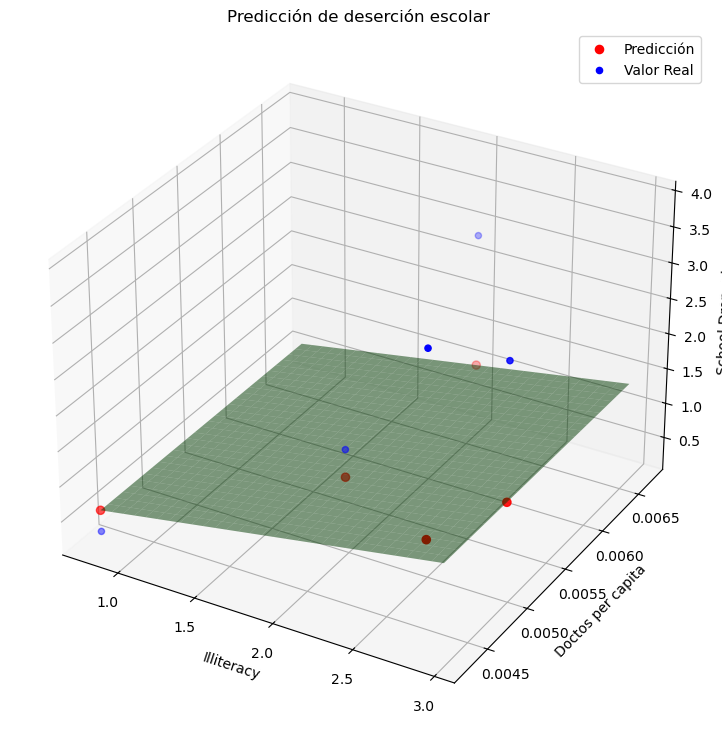

In [78]:
nx = x_test[["illiteracy"]]
ny = x_test[["doctors_per_cap"]]
nz = pred

nx = np.array(nx, dtype = float)
ny = np.array(ny, dtype = float)
nz = np.array(nz, dtype = float)

fig=plt.figure()
fig.set_size_inches(9, 11)

ax=fig.add_subplot(111, projection = "3d")

#GRAFICAMOS LOS PUNTOS PREDICHOS Y LOS VALORES REALES
ax.scatter(nx, ny, nz, c = "red", s = 35, label = "Predicción")
ax.scatter(nx, ny, y_test, c = "blue", s = 20, label = "Valor Real")

nx_range = np.linspace(nx.min(), nx.max(), 30)
ny_range = np.linspace(ny.min(), ny.max(), 30)
NX, NY = np.meshgrid(nx_range, ny_range)

#GRAFICAMOS EL PLANO
NZ = model.predict(np.column_stack((NX.ravel(), NY.ravel())))
NZ = NZ.reshape(NX.shape)
ax.plot_surface(NX, NY, NZ, alpha=0.5, color = "green")

#AGREGAMOS LAS ETIQUETAS Y EL TITULO
ax.set_xlabel("Illiteracy")
ax.set_ylabel("Doctos per capita")
ax.set_zlabel("School Dropout")
ax.set_title("Predicción de deserción escolar")
plt.legend()
plt.show()

In [79]:
#COMPARAMOS LAS PREDICCIONES HECHAS CON LOS VALORES REALES
y_test = np.array(y_test, dtype = float)
comp = pd.DataFrame({'Valor real':y_test.flatten(),'Valor predicho':pred.flatten()})
comp

,Valor real,Valor predicho
0,2.872181,1.002246
1,3.298413,1.367633
2,3.864265,1.292481
3,1.393504,1.001465
4,0.289262,0.593133


In [80]:
yt = y_test.flatten()
pred = pred.flatten()

mae = mean_absolute_error(yt, pred)
mse = mean_squared_error(yt, pred)
rmse = mse**(1/2.0)
r2 = r2_score(yt, pred)
m = max_error(yt, pred)
rss = mse*len(pred)

#ERROR ABSOLUTO MÁXIMO
print(f"El error absoluto máximo es: {round(m, 2)}")

#ERROR ABSOLUTO PROMEDIO o Mean Absolute error MAE
print(f"El error absoluto promedio es: {round(mae, 2)}") 

#ERROR CUADRATICO PROMEDIO o Mean Squared error MSE
print(f"El error cuadrático medio es: {round(mse, 2)}")

#SUMA DE LOS CUADRADOS DE LOS RESIDUOS:
print(f"La suma de los cuadrados de los residuos es: {round(rss, 2)}")

#RAIZ CUADRADA DEL ERROR CUADRATICO MEDIO o Root Mean Squared error RMSE
print(f"La raíz cuadrada del error cuadrático medio es: {round(rmse, 2)}")

#R2 
print(f"El R cuadrado es: {round(r2, 2)}")

El error absoluto máximo es: 2.57
El error absoluto promedio es: 1.41
El error cuadrático medio es: 2.82
La suma de los cuadrados de los residuos es: 14.08
La raíz cuadrada del error cuadrático medio es: 1.68
El R cuadrado es: -0.63
